# Distributions of Words & Sentences

This assignment is comprised of 4 required tasks an additional task for bonus points:

1. Manually do POS tagging of two sentences and provide 2 syntactic parsies for an ambiguous sentence. 
2. The first task is to compute the frequency vs. rank distribution of the words in Moby Dick. For this, you will need to tokenize the document and create a vocabulary mapping word types to their document frequency.
3. The second task is to segment the document into sentences and compute the sentence length distribution. Here you will experiment with spaCy's default sentence segmenter as well as the simple rule-based Sentencizer.
4. The third task is the same as the first except that we use subword tokenization.
5. [Bonus] Use spacy's NE recognizer to find all named entities in the first 2,500 paragraphs. Count how many times they appear in the document and consolidate them based on their most frequent type.

## Sean Devlin:

# <font color="blue"> Submission instructions</font>

1. Click the Save button at the top of the Jupyter Notebook.
2. Please make sure to have entered your name above.
3. Select Edit -> Clear Output of All Cells. This will clear all the outputs from all cells (but will keep their content). 
4. Select Run -> Run All Cells. This will run all the cells in order, and may take several seconds.
5. Once you've rerun everything, select File -> Save and Export Notebook As -> PDF and download a PDF version showing the code and the output of all cells, and save it in the same folder that contains the notebook file.
6. Look at the PDF file and make sure all your solutions and outputs are there, displayed correctly.
7. Submit **both** the PDF and your notebook file .ipynb on Canvas.
8. Make sure your your Canvas submission contains the correct files by downloading it after posting it on Canvas.

## Linguistic Structures (20 points)

Consider the two sentences below:

1. **They discussed the elephant in the room**

2. **She created a mobile app that dancers like**

Complete the following two tasks:

* For each sentence, annotate each word with its part of speech (POS) tag. Use the Penn Treebank POS tags shown in Figure 17.2 in the textbook.

  - To show the POS tagging of each sentence, you can use the `/` to separate the wrod from its tag, e.g., *word1/tag1 word2/tag2 ... wordk/tagk*.

* For sentence 1, provide two different valid syntactic analyses (two phrase structure trees, or two dependency trees).

  - To show the trees, you can create them as figures in a tool such as Powerpoint, save them as pictures, which you can then include in this notebook. Alternatively, you can use a text-based indented format, as shown in Figure 18.5 in the textbook.

1. They/PP discussed/VBD the/DT elephant/NN in/IN the/DT room/NN

2. She/PP created/VBD a/DT mobile/JJ app/NN that/WDT dancers/NNS like/VBP


## Word distributions using the SpaCy tokenizer (40 + 10 points)

First, create the spaCy tokenizer.

In [62]:
from spacy.lang.en import English
nlp = English()

tokenizer = nlp.tokenizer

Create a *vocab* dictionary. This dictionary will map tokens to their counts in the input text file.

In [63]:
vocab = {}

Read the input file line by line.

1. Tokenize each line.
2. For each token in the line that contains only letters, convert it to lower case and increment the corresponding count in the dictionary.
    - If the token does not exist in the dictionary yet, insert it with a count of 1. For example, the first time the token 'water' is encountered, the code should evaluate *vocab['water'] = 1*.

At the end of this code segment, *vocab* should map each word type to the number of times it appeared in the entire document. There should be 16830 word types and 214287 words in Moby Dick.

In [64]:
from collections import defaultdict
vocab = defaultdict(int)

with open('../data/melville-moby_dick.txt', 'r') as f:
    for line in f:
        doc = tokenizer(line)
        for word in doc:
            if word.text.isalpha():
                vocab[word.text.lower()] += 1

        
        
        
print('There are', len(vocab), 'word types in Moby Dick.')
print('There are', sum(vocab.values()), 'words in Moby Dick.')

There are 16830 word types in Moby Dick.
There are 214287 words in Moby Dick.


Create a list *ranked* of tuples *(word, freq)* that contains all the words in the vocabulary *vocab* sorted by frequency. For example, if *vocab = {'duck':2, 'goose':5, 'turkey':3}*, then *ranked = [('goose', 5), ('turkey', 3), ('duck', 2)]*. 

In [65]:
ranked = [] # YOUR CODE GOES HERE

ranked = [(key, vocab[key]) for key in vocab.keys()]

ranked.sort(key=lambda entry: entry[-1], reverse=True)

Print the top 10 words in the sorted list.

In [66]:
print('Size of vocabulary:', len(ranked))
for word, freq in ranked[:10]:
    print(word, freq)

Size of vocabulary: 16830
the 14388
of 6606
and 6414
a 4698
to 4618
in 4164
that 3061
his 2527
it 2489
i 2068


Plot the frequency vs. rank of the top ranked words in Moby Dick.

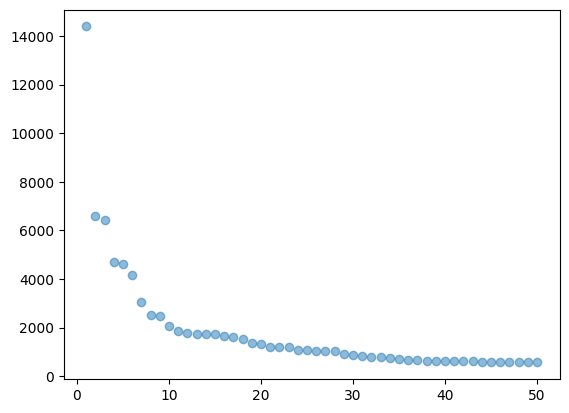

In [67]:
import matplotlib.pyplot as plt
ranks = range(1, 50 + 1)
freqs = [t[1] for t in ranked[:50]]
plt.scatter(ranks, freqs, c='#1f77b4', alpha=0.5)
plt.show()

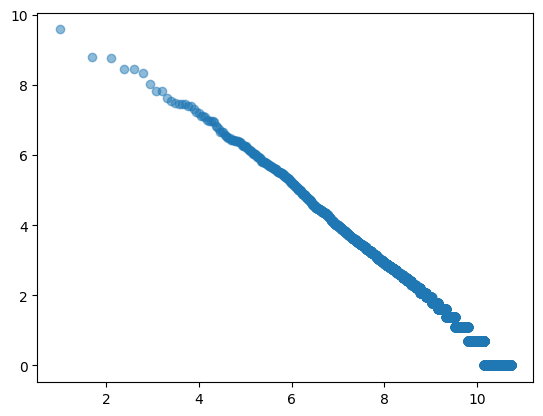

In [68]:
import math
ranks = [1 + math.log(r) for r in range(1, len(ranked) + 1)]
freqs = [math.log(t[1]) for t in ranked]
plt.scatter(ranks, freqs, c='#1f77b4', alpha=0.5)
plt.show()

---

## Sentence distributions (40 + 10 points)

First, try to create the spaCy nlp object from the entire text of Moby Dick. This will likely not work, it is not a good idea to read all the text.

In [69]:
import spacy

nlp = spacy.load("en_core_web_sm")
text = open('../data/melville-moby_dick.txt', 'r').read()
doc = nlp(text)

ValueError: [E088] Text of length 1220066 exceeds maximum of 1000000. The parser and NER models require roughly 1GB of temporary memory per 100,000 characters in the input. This means long texts may cause memory allocation errors. If you're not using the parser or NER, it's probably safe to increase the `nlp.max_length` limit. The limit is in number of characters, so you can check whether your inputs are too long by checking `len(text)`.

Instead, read the document paragraph by paragraph, i.e. in chunks of text separated by empty lines. Before using spaCy to segment a paragraph into sentences, replace each end of line character with a whitespace, to allow a sentence to span multiple lines. After sentence segmentation, for each sentence in the paragraph append its length (in tokens) to *lengths*. Use the default *nlp* class to process each paragraph and split it into sentences. Stop after processing 1000 paragraphs. This will be slow, so be patient.

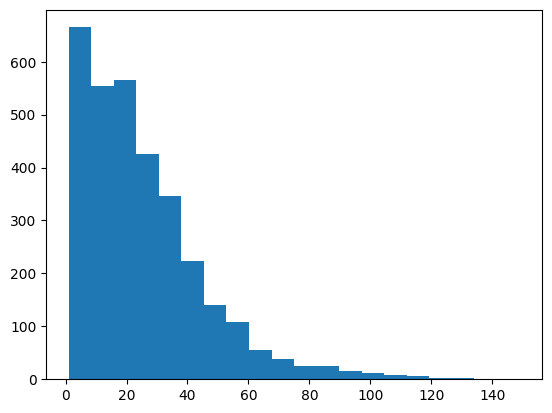

In [ ]:
import spacy

nlp = spacy.load("en_core_web_sm")

# the number of paragraphs read so far.
count = 0 
# stores the length of each sentence processed so far.
lengths = []
# make sure the file is read and processed line by line.
with open('../data/melville-moby_dick.txt', 'r') as f:
    # YOUR CODE GOES HERE
    para = ""

    for line in f:
        if count >= 1000:
            break

        if line != "\n":
            para += line.replace("\n", " ")
        else:
            doc = nlp(para)
            for sent in doc.sents:
                lengths.append(len(sent))
            
            para = ""
            count += 1
    




    
len150 = [l for l in lengths if l <= 150]
plt.hist(len150, bins = 20)
plt.show()

Next, do the same processing as above, but use the more robust Sentencizer to split paragraphs into sentences. Note the speedup.

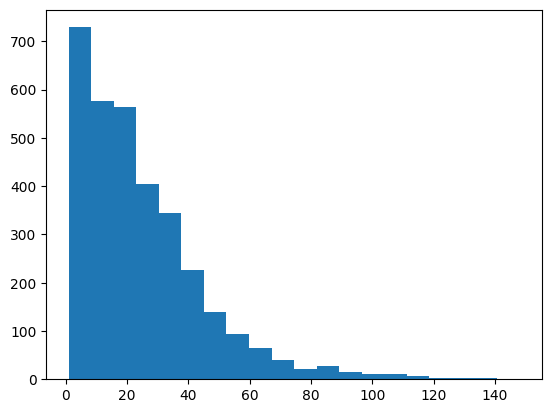

In [ ]:
from spacy.lang.en import English

nlp = English()
nlp.add_pipe("sentencizer")

# the number of paragraphs read so far.
count = 0
# stores the length of each sentence processed so far.
lengths = []
with open('../data/melville-moby_dick.txt', 'r') as f:
    # YOUR CODE GOES HERE
    para = ""

    for line in f:
        if count >= 1000:
            break

        if line != "\n":
            para += line.replace("\n", " ")
        else:
            doc = nlp(para)
            for sent in doc.sents:
                lengths.append(len(sent))
            
            para = ""
            count += 1
    



    
    
len150 = [l for l in lengths if l <= 150]
plt.hist(len150, bins = 20)
plt.show()

Note the difference between the two histograms. Identify at least 5 examples of sentences in Moby Dick that are segmented differently by the two approaches. Copy them below and explain the differences. Which method seems to be more accurate?

Without vs. With Sentencizer
1. 
2. 
3. 
4. 
5. 

In [ ]:
import spacy
from spacy.lang.en import English
from itertools import zip_longest

# Load models
nlp1 = spacy.load("en_core_web_sm")

nlp2 = English()
nlp2.add_pipe("sentencizer")

def normalize(text):
    return " ".join(text.split())

with open("../data/melville-moby_dick.txt", "r", encoding="utf8") as f:
    for line_num, line in enumerate(f, start=1):
        doc1 = nlp1(line)
        doc2 = nlp2(line)

        sents1 = [normalize(sent.text) for sent in doc1.sents]
        sents2 = [normalize(sent.text) for sent in doc2.sents]

        # Case 1: different number of sentences
        if len(sents1) != len(sents2):
            print(f"\nLine {line_num}: sentence count mismatch")
            print(f"spaCy parser: {len(sents1)} sentences")
            print(f"Sentencizer: {len(sents2)} sentences")

        # Case 2: same count, but different boundaries/text
        for i, (s1, s2) in enumerate(zip_longest(sents1, sents2), start=1):
            if s1 != s2:
                print(f"\nLine {line_num}, sentence {i}")
                print("spaCy parser:")
                print(f"  {s1}")
                print("Sentencizer:")
                print(f"  {s2}")



Line 4: sentence count mismatch
spaCy parser: 1 sentences
Sentencizer: 2 sentences

Line 4, sentence 2
spaCy parser:
  None
Sentencizer:
  

Line 12: sentence count mismatch
spaCy parser: 1 sentences
Sentencizer: 2 sentences

Line 12, sentence 2
spaCy parser:
  None
Sentencizer:
  

Line 19: sentence count mismatch
spaCy parser: 4 sentences
Sentencizer: 5 sentences

Line 19, sentence 2
spaCy parser:
  Sw. and Dan.
Sentencizer:
  Sw.

Line 19, sentence 3
spaCy parser:
  HVAL.
Sentencizer:
  and Dan.

Line 19, sentence 4
spaCy parser:
  This animal is named from roundness
Sentencizer:
  HVAL.

Line 19, sentence 5
spaCy parser:
  None
Sentencizer:
  This animal is named from roundness

Line 23: sentence count mismatch
spaCy parser: 3 sentences
Sentencizer: 4 sentences

Line 23, sentence 2
spaCy parser:
  It is more immediately from the Dut. and Ger.
Sentencizer:
  It is more immediately from the Dut.

Line 23, sentence 3
spaCy parser:
  WALLEN;
Sentencizer:
  and Ger.

Line 23, sentence 

KeyboardInterrupt: 

---

## Word distribution using OpenAI's subword tokenization (30 points)

In this part, we will compute the frequency vs. rank based on the the BPE subword tokenization created by the [tiktoken module from OpenAI](https://github.com/openai/tiktoken).

Read the input file line by line.

1. Tokenize each line using `tiktoken` encoder and decoder for GPT-4.
2. For each token in the line that contains only letters, convert it to lower case and increment the corresponding count in the dictionary.
    - If the token does not exist in the dictionary yet, insert it with a count of 1. For example, the first time the token 'water' is encountered, the code should evaluate *vocab['water'] = 1*.

At the end of this code segment, *vocab* should map each word type to the number of times it appeared in the entire document. There should be 12659 unique types and 248615 total tokens in Moby Dick.

In [ ]:
import tiktoken
from collections import defaultdict

# To get the tokeniser corresponding to a specific model in the OpenAI API:
enc = tiktoken.encoding_for_model("gpt-3.5-turbo")

vocab = defaultdict(int)
with open('../data/melville-moby_dick.txt', 'r') as f:
    for line in f:
        # YOUR CODE HERE
        tokens = enc.encode(line)
        for token in tokens:
            token_text = enc.decode_single_token_bytes(token).strip().lower()
            if token_text.isalpha():
                vocab[token_text] += 1

        
                    
print('There are', len(vocab), 'unique tokens in Moby Dick.')
print('There are', sum(vocab.values()), 'tokens in Moby Dick.')

There are 12659 unique tokens in Moby Dick.
There are 248615 tokens in Moby Dick.


Rank the tokens based on their frequency, then plot frequency vs. rank.

In [ ]:
ranked = [] # YOUR CODE GOES HERE

ranked = [(key, vocab[key]) for key in vocab.keys()]

ranked.sort(key=lambda entry: entry[-1], reverse=True)

print('Size of vocabulary:', len(ranked))
for word, freq in ranked[:10]:
    print(word, freq)

Size of vocabulary: 12659
b'the' 14407
b'of' 6600
b'and' 6416
b'a' 5443
b'to' 4666
b'in' 4398
b'that' 3073
b'it' 2560
b'his' 2543
b'i' 2099


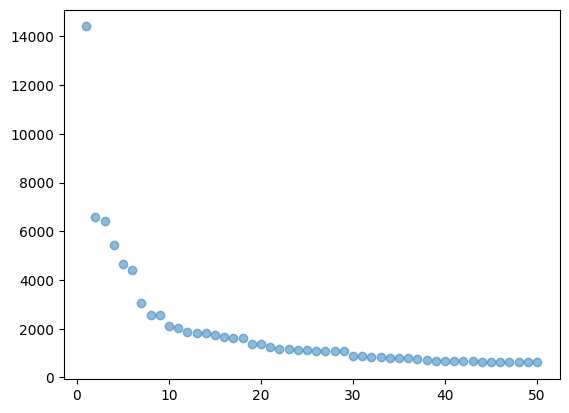

In [ ]:
import matplotlib.pyplot as plt
ranks = range(1, 50 + 1)
freqs = [t[1] for t in ranked[:50]]
plt.scatter(ranks, freqs, c='#1f77b4', alpha=0.5)
plt.show()

---

## [Bonus] Named Entities (10 + 10 + 10 + 10 + 10 points)

Useful documentation is at:
- https://spacy.io/usage/linguistic-features#named-entities
- https://spacy.io/api/entityrecognizer

In [ ]:
import spacy

nlp = spacy.load("en_core_web_sm")

# These are all the entity types covered by spaCy's NE recognizer.
nlp.pipe_labels['ner']

['CARDINAL',
 'DATE',
 'EVENT',
 'FAC',
 'GPE',
 'LANGUAGE',
 'LAW',
 'LOC',
 'MONEY',
 'NORP',
 'ORDINAL',
 'ORG',
 'PERCENT',
 'PERSON',
 'PRODUCT',
 'QUANTITY',
 'TIME',
 'WORK_OF_ART']

Read the first 2,500 paragraphs in Moby Dick and extract all named entities into a dictionary `ne_counts` that maps each *named entity* to its frequency. By *named entity* we mean a tuple *(name, type)* where *name* is the entity name as a string, and *type* is its entity type. For example, if the name 'Ahab' appears with the NE type 'PERSON' 50 times, then the dictionary should map the key *('Ahab', 'PERSON')* to the value *50*.

In [ ]:
# The number of paragraphs read so far.
count = 0 
# Stores the dictionary of named entites and their counts.
ne_counts = {}

# Make sure the file is read line by line.
with open('../data/melville-moby_dick.txt', 'r') as f:
    # YOUR CODE GOES HERE
    
    



Create a list `ranked_ne` containing all the items in the `ne_counts` dictionary that is sorted in descending order by their frequency.

In [ ]:
ranked_ne = [] # YOUR CODE GOES HERE

# This should display 2974 unique named entities, with the top two being
# ('one', 'CARDINAL') 354 and ('Ahab', 'PERSON') 351 
print('Unique named entities:', len(ranked_ne))
for ne, count in ranked_ne[:50]:
    print(ne, count)

### Consolidate named entities

Some names appear with more than one type, most often due to errors in named entity recognition. One way to fix such errors is to use the fact that typically a name occurs with just one meaning in a document, as such it has just one type. In this part of the assignment, we will consolidate the extracted names such that the counts for the same name appearing with multiple types are added together, and by associating the name with the type that it appears with most often.

Create a dictionary `ne_types` that maps each name to a dictionary that contains all the types the name appears with, where each type is mapped to the corresponding count. Use information from the dictionary `ne_counts` above.

In [ ]:
ne_types = {}

# YOUR CODE HERE




print(ne_types['Queequeg']) # this should print {'PERSON': 15, 'GPE': 23, 'LOC': 3, 'NORP': 10, 'ORG': 1}

print(ne_types['Gabriel']) # this should print {'PERSON': 20}

Create the consolidated dictionary `ne_cons` that maps each name to a tuple that contains its most frequent type and the total count over all types. Use information from the dictionary `ne_types` above.

In [ ]:
ne_cons = {}

# YOUR CODE HERE



print(ne_cons['Queequeg']) # this should print ('GPE', 52)

print(ne_cons['Gabriel']) # this should print ('PERSON', 20)

Create a list `ranked_nec` that contains only the consolidated entries from `ne_cons` whose type is among the types listed in the list `types` below, sorted in descending order based on their total counts.

In [ ]:
types = ['PERSON', 'GPE', 'ORG', 'LOC', 'FAC']

# YOUR CODE HERE


ranked_nec = 


# This should display 1632 consolidated named entities, with the top two entries being
# Ahab ('PERSON', 351) and Pequod ('GPE', 150)
print('Consolidated named entities:', len(ranked_nec))
for ne, count in ranked_nec[:30]:
    print(ne, count)

**[Extra Bonus points 1] (5 points)** Select one name from the dictionary `ne_counts` that appears frequently with 2 types and explain why you think spaCy's named entity recognizer associated the name with those 2 types.

**[Extra Bonus points 2] (10 points)** Find all the syntactic dependency paths connecting the subject Ahab with a direct object, e.g. 'Ahab' ---> nsubj ---> $<$verb$>$ ---> dobj ---> $<$object$>$. Rank all the object words based on how frequently they appear connected to 'Ahab' through this syntactic pattern, and for the top 10 objects display the list of verbs that are used with each object. 

Useful documentation is at:
- https://spacy.io/usage/linguistic-features#dependency-parse

In [ ]:
# YOUR CODE HERE





***

## Bonus points

Anything extra goes here. For example:

* Write code Li (1992) showing that just random typing of letters including a space will generate “words” with a Zipfian distribution. Generate at least 1 million characters before your compute word frequencies.

  - Show mathematically that random typing results in a Zipf's distribution by computing probabilities for all words that contain just 1 letter, 2 letters, ...
  
* Implement the BPE algorithm, where you break ties by selecting to merge in lexicographic order. Train the BPE algorithm on a large corpus and then use it to do subword tokenization on the Mobby Dick corpus. What are the top 10 most frequenct tokens and how does it compare with what you got from `tiktokenizer`.
